## Reinforcement Learning : Maze Solver using Q-Learning

In [5]:
import numpy as np
import matplotlib.pyplot as plt

The maze is represented as a 2D grid:
- `0` (empty), `1` (obstacle), and `2` (goal).
- The agent starts at the top-left corner (`0, 0`).
- Actions (`UP`, `DOWN`, `LEFT`, `RIGHT`) allow the agent to move through the grid.

In [6]:
# Maze grid: 0 = empty, 1 = obstacle, 2 = goal
MAZE = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 2, 0],
])

# Maze dimensions
ROWS, COLS = MAZE.shape

# Define actions: Up, Down, Left, Right
ACTIONS = ["UP", "DOWN", "LEFT", "RIGHT"]
ACTION_TO_DELTA = {
    "UP": (-1, 0),
    "DOWN": (1, 0),
    "LEFT": (0, -1),
    "RIGHT": (0, 1),
}

# Start position
START_POS = (0, 0)

# Check if a position is valid
def is_valid(pos):
    r, c = pos
    return 0 <= r < ROWS and 0 <= c < COLS and MAZE[r, c] != 1


In [7]:
# Reset environment
def reset():
    return START_POS

# Take a step in the environment
def step(pos, action):
    delta = ACTION_TO_DELTA[action]
    new_pos = (pos[0] + delta[0], pos[1] + delta[1])

    if not is_valid(new_pos):
        new_pos = pos  # Invalid move, stay in place

    # Reward structure
    if MAZE[new_pos] == 2:  # Goal
        reward = 10
        done = True
    else:
        reward = -1  # Step cost
        done = False

    return new_pos, reward, done


In [8]:
# Initialize Q-table
q_table = np.zeros((ROWS, COLS, len(ACTIONS)))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0
epsilon_decay = 0.99
epsilon_min = 0.1
num_episodes = 1000

# Training loop
for episode in range(num_episodes):
    pos = reset()
    done = False

    while not done:
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action_idx = np.random.choice(len(ACTIONS))
        else:
            action_idx = np.argmax(q_table[pos])
        action = ACTIONS[action_idx]

        # Take a step
        next_pos, reward, done = step(pos, action)

        # Update Q-value
        td_target = reward + discount_factor * np.max(q_table[next_pos])
        td_error = td_target - q_table[pos + (action_idx,)]
        q_table[pos + (action_idx,)] += learning_rate * td_error

        pos = next_pos

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)


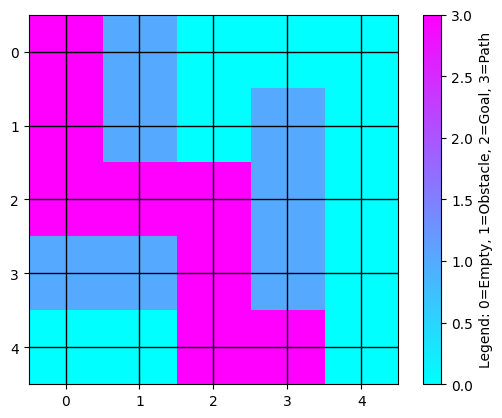

In [9]:
# Visualize the shortest path based on the trained policy
def render_policy():
    pos = reset()
    maze_copy = MAZE.copy()
    maze_copy[pos] = 3  # Start position

    while True:
        action_idx = np.argmax(q_table[pos])
        action = ACTIONS[action_idx]
        next_pos, _, done = step(pos, action)
        if next_pos == pos:  # No valid moves
            break
        maze_copy[next_pos] = 3  # Mark path
        pos = next_pos
        if done:
            break

    # Render the policy on the maze
    plt.imshow(maze_copy, cmap="cool", interpolation="nearest")
    plt.xticks(range(COLS))
    plt.yticks(range(ROWS))
    plt.grid(color="black", linestyle="-", linewidth=1)
    plt.colorbar(label="Legend: 0=Empty, 1=Obstacle, 2=Goal, 3=Path")
    plt.show()

# Display the learned policy
render_policy()


In [10]:
pip install colorama

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
from colorama import Fore, init
# init(autoreset=True)

def render_policy_text():
    pos = reset()
    maze_copy = MAZE.copy()
    maze_copy[pos] = 3  # Start position

    path = []  # Track path
    while True:
        path.append(pos)
        action_idx = np.argmax(q_table[pos])
        action = ACTIONS[action_idx]
        next_pos, _, done = step(pos, action)

        if next_pos == pos:  # Stuck, no valid moves
            break
        maze_copy[next_pos] = 3  # Mark path
        pos = next_pos
        if done:
            path.append(pos)
            break

    # Helper function to add colors
    def colorize(cell):
        if cell == 0:
            return f"{Fore.CYAN}."  # Empty space
        elif cell == 1:
            return f"{Fore.RED}#"  # Obstacle
        elif cell == 2:
            return f"{Fore.GREEN}G"  # Goal
        elif cell == 3:
            return f"{Fore.MAGENTA}*"  # Path

    # Print the original maze
    print("Original Maze:")
    for row in MAZE:
        print(" ".join(colorize(cell) for cell in row))

    print("\nShortest Path Learned by the Agent:")
    for row in maze_copy:
        print(" ".join(colorize(cell) for cell in row))

# Display the learned policy
render_policy_text()


Original Maze:
. # . . .
. # . # .
. . . # .
# # . # .
. . . G .

Shortest Path Learned by the Agent:
* # . . .
* # . # .
* * * # .
# # * # .
. . * * .
